![mod cloth logo](img/modcloth-logo.png )

# ModCloth Dress Fit Prediction (Part-1)

This notebook steps through the process of dress size prediction. The dataset that is being used is scraped from modcloth dataset. The dataset has been carefully prepared from the comments. This is the second part of the Notebook Series. The first notebook does the Exploratory Data Analysis.


In [4]:
from mlxtend.plotting import plot_decision_regions

## import the packages

Import the necessary packages for Exploratory data analyis. Most of the EDA work will be done in Pandas and Matplotlib.

In [1]:
import os
#######################################
# Basic packages for pandas and numpy #
# Use visualization of Matplotlib     #
######################################
import numpy as np
import pandas as pd
import sklearn.preprocessing
import zipfile


#######################
#       imports       #
#######################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import pickle

######################################################
# Basic packages machine learning using scikit learn #
# Use visualization of Matplotlib                    #
######################################################

from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!


from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split

# Plot the lines inline
sns.set_style("whitegrid")
%matplotlib inline
# make prettier plots
%config InlineBackend.figure_format = 'svg' 

ModuleNotFoundError: No module named 'mlxtend'

- Listing the rental datasets which are downloaded from Kaggle. The main eda is done on Modcloth and exohenous data from rent the runway is also used to build insights.

In [2]:
!ls -l clothing-fit-dataset-for-size-recommendation

total 159980
-rwxr-xr-x 1 sdutta sdutta  40566141 Aug 21  2018 modcloth_final_data.json
-rwxr-xr-x 1 sdutta sdutta 123251881 Aug 21  2018 renttherunway_final_data.json


## Explore the dataset
- Lets read the json file. Since we have executed the notebook many times, we are going to use a pickle version of the dataframe so that data can be rea faster.

In [3]:
#modcloth_df = pd.read_json("clothing-fit-dataset-for-size-recommendation/modcloth_final_data.json", lines=True)
modcloth_df = pd.read_pickle("dataframe/modcloth_renamed.pkl")
modcloth_df.head(100)

,bra_size,bust,category,cup_size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe_size,shoe_width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN
5,36.0,NaN,new,c,small,5ft 4in,41.0,123373,just right,5.0,NaN,NaN,NaN,NaN,11,162012,Doreenajane,27.0
6,32.0,NaN,new,b,large,5ft 3in,NaN,123373,just right,1.0,NaN,NaN,NaN,NaN,5,114843,barbiejenks,26.0
7,38.0,NaN,new,d,small,5ft 5in,42.0,123373,just right,5.0,NaN,NaN,8.5,NaN,11,58869,brettloie,NaN
8,42.0,NaN,new,d,small,5ft 10in,50.0,123373,just right,4.0,NaN,NaN,11.0,wide,30,279568,francescaviola,NaN
9,36.0,39,new,dd/e,fit,5ft 6in,41.0,123373,just right,5.0,NaN,NaN,9.0,NaN,13,950172,laurenpolzin,NaN


In [7]:
modcloth_df.describe()

,bra_size,hips,item_id,quality,shoe_size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


### Selecting columns

Looking at all the columns you can see that not all columns are useful. We select the following columns
- Bra Size
- Category
- Cup Size
- Height
- Hips
- Length
- Quality
- Size
- Fit (Prediction)

Next we will drop nulls from the dataset.

In [5]:
columns_selected = ["bra_size", "category", "cup_size","height","hips","length","quality","size","fit"]
sel_modcloth_df = modcloth_df[columns_selected]
sel_modcloth_df.to_pickle("dataframe/modcloth_selected.pkl")
sel_modcloth_df.dropna(inplace=True)
sel_modcloth_df.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,bra_size,category,cup_size,height,hips,length,quality,size,fit
0,34.0,new,d,5ft 6in,38.0,just right,5.0,7,small
1,36.0,new,b,5ft 2in,30.0,just right,3.0,13,small
5,36.0,new,c,5ft 4in,41.0,just right,5.0,11,small
7,38.0,new,d,5ft 5in,42.0,just right,5.0,11,small
8,42.0,new,d,5ft 10in,50.0,just right,4.0,30,small


### Convert Hieght to inches

Below function changes the height in ft and inches to inches so that in can quantitatively analyzed.
- We create a new field/column called "hieght_inches" to store the value
- Drop the original field hieght

In [6]:
def convert_toinches(ht_str):
    hts = ht_str.split(" ")
    hts_ht_ft = int(''.join(list(hts[0])[:-2]))
    hts_ht_in = 0
    if len(hts) > 1:
        hts_ht_in = int(''.join(list(hts[1])[:-2]))
    return hts_ht_ft*12 +hts_ht_in

In [7]:
sel_modcloth_df["height_inches"]  = sel_modcloth_df.height.apply(convert_toinches)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
sel_modcloth_df.drop(columns=["height"], axis=1, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
sel_modcloth_df.head(3)

,bra_size,category,cup_size,hips,length,quality,size,fit,height_inches
0,34.0,new,d,38.0,just right,5.0,7,small,66
1,36.0,new,b,30.0,just right,3.0,13,small,62
5,36.0,new,c,41.0,just right,5.0,11,small,64


Next we would want to convert the categorical data into dummy variables/one hot vector

Sample Code for Dummies 
- http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

In [10]:
sel_modcloth_df = pd.concat([sel_modcloth_df,pd.get_dummies(sel_modcloth_df['category'], prefix='category')],axis=1)

In [11]:
sel_modcloth_df.drop(columns=["category"],inplace=True)
sel_modcloth_df.head(2)

,bra_size,cup_size,hips,length,quality,size,fit,height_inches,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding
0,34.0,d,38.0,just right,5.0,7,small,66,0,0,1,0,0,0,0
1,36.0,b,30.0,just right,3.0,13,small,62,0,0,1,0,0,0,0


In [12]:
(sel_modcloth_df.cup_size.unique())

array([u'd', u'b', u'c', u'dd/e', u'ddd/f', u'dddd/g', u'i', u'a', u'h',
       u'aa', u'k', u'j'], dtype=object)

In [13]:
sel_modcloth_df['cup_size_num']=sel_modcloth_df.cup_size.replace(['a', 'aa','b','c','d','dd/e','ddd/f','dddd/g','h','i','j','k'],[0,1,2,3,4,5,6,7,8,9,10,11])

In [14]:

#def encodeLabels(df):
#    le = LabelEncoder()
#    labels = le.fit_transform(df)
#    return pd.DataFrame(labels)
    
sel_modcloth_df['fit_num'] = sel_modcloth_df['fit'].replace(['small', 'fit','large'],[0,1,2])

In [15]:
sel_modcloth_df.drop(columns=["cup_size"],axis=1, inplace=True)

In [16]:
sel_modcloth_df.drop(columns=["fit"],axis=1, inplace=True)
sel_modcloth_df.drop(columns=["length"],axis=1, inplace=True)

In [17]:
sel_modcloth_df.head(10)

,bra_size,hips,quality,size,height_inches,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,cup_size_num,fit_num
0,34.0,38.0,5.0,7,66,0,0,1,0,0,0,0,4,0
1,36.0,30.0,3.0,13,62,0,0,1,0,0,0,0,2,0
5,36.0,41.0,5.0,11,64,0,0,1,0,0,0,0,3,0
7,38.0,42.0,5.0,11,65,0,0,1,0,0,0,0,4,0
8,42.0,50.0,4.0,30,70,0,0,1,0,0,0,0,4,0
9,36.0,41.0,5.0,13,66,0,0,1,0,0,0,0,5,1
10,40.0,49.0,4.0,24,66,0,0,1,0,0,0,0,4,0
11,44.0,60.0,5.0,33,64,0,0,1,0,0,0,0,6,0
14,34.0,36.0,5.0,3,63,0,0,1,0,0,0,0,2,1
15,40.0,50.0,4.0,27,64,0,0,1,0,0,0,0,3,1


In [58]:
sel_modcloth_df.drop(columns=["category"],axis=1, inplace=True)

In [111]:
sel_modcloth_df.to_pickle("dataframe/sel_modcloth_df_final2.pkl")

In [ ]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

# prints confusion matrix as a heatmap which is nicer to visaulize

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [58]:
#Persisting the dataframe
def pickle_model():
    sel_modcloth_df.to_pickle("dataframe/sel_modcloth_df.pkl")

In [59]:
sel_modcloth_df_qual = pd.concat([sel_modcloth_df,pd.get_dummies(sel_modcloth_df['quality'], prefix='quality')],axis=1)

In [61]:
sel_modcloth_df_qual.drop(columns=["quality"], axis=1, inplace=True)

In [63]:
sel_modcloth_df_qual.to_pickle("dataframe/sel_modcloth_df_qual.pkl")

In [65]:
!ls dataframe

modcloth_renamed.pkl   renttherunway_renamed.pkl  sel_modcloth_df_qual.pkl
modcloth_selected.pkl  sel_modcloth_df.pkl


#### EDA
--------------- End-----------------

In [17]:
modcloth_df.hips.value_counts().head(10)

35.0    6090
40.0    5452
38.0    4961
36.0    4829
42.0    3637
39.0    3263
37.0    3162
41.0    3146
44.0    2570
34.0    2455
Name: hips, dtype: int64

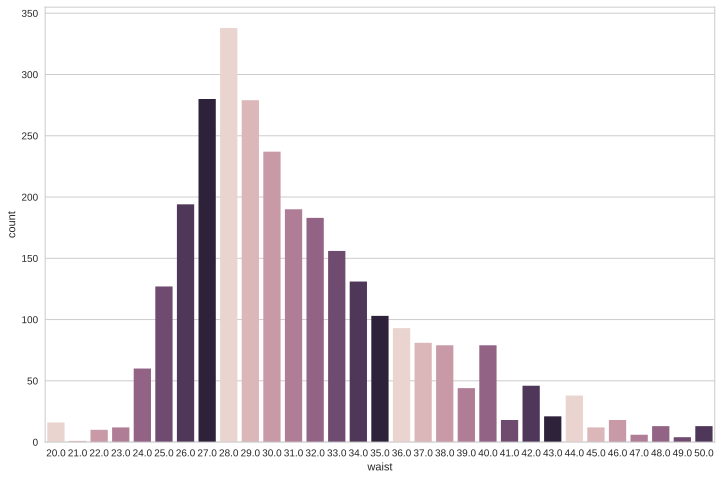

In [37]:
plt.figure(figsize=(12,8))
sns_plot = sns.countplot(modcloth_df.waist, palette=sns.cubehelix_palette(8))
fig = sns_plot.get_figure()
fig.savefig('waist.png')

In [97]:
modcloth_df["fit"].value_counts()

fit      56757
large    13059
small    12974
Name: fit, dtype: int64

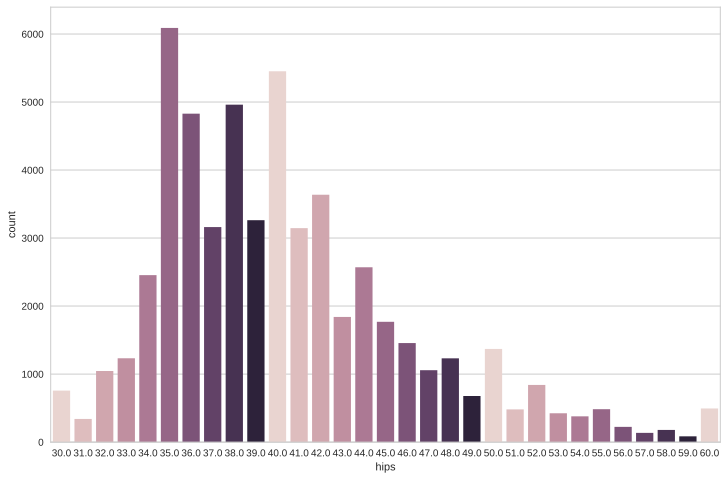

In [40]:
plt.figure(figsize=(12,8))
sns_plot = sns.countplot(modcloth_df.hips, palette=sns.cubehelix_palette(10))
fig = sns_plot.get_figure()
fig.savefig('hips.png')

In [ ]:
#sns.jointplot(modcloth_df.hips,modcloth_df.size, color="#4CB391")
plt.scatbter(x=modcloth_df["hips"],y=modcloth_df["size"])
plt.show()
#len(modcloth_df["hips"]), len(modcloth_df["size"])

In [93]:
sel_modcloth_df.size.value_counts()

AttributeError: 'numpy.int64' object has no attribute 'value_counts'

In [60]:
sns.pairplot(sel_modcloth_df)
#sel_modcloth_df.head()

In [12]:
np.sort(modcloth_df.hips.unique())

array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., nan])

In [26]:
np.sort(modcloth_df.waist.unique()), np.sort(modcloth_df.length.unique()), np.sort(modcloth_df.quality.unique())

(array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
        46., 47., 48., 49., 50., nan]),
 array([nan, u'just right', u'slightly long', u'slightly short',
        u'very long', u'very short'], dtype=object),
 array([ 1.,  2.,  3.,  4.,  5., nan]))

In [27]:
np.sort(modcloth_df.bust.unique()), np.sort(modcloth_df.height.unique()), np.sort(modcloth_df.bust.unique()), np.sort(modcloth_df.fit.unique())

(array([nan, u'20', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
        u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'37-39',
        u'38', u'39', u'40', u'41', u'42', u'43', u'44', u'45', u'46',
        u'47', u'48', u'49', u'50', u'51', u'52', u'53', u'54', u'55',
        u'56', u'57', u'58', u'59'], dtype=object),
 array([nan, u'3ft', u'3ft 11in', u'3ft 2in', u'3ft 3in', u'3ft 4in',
        u'3ft 6in', u'4ft 10in', u'4ft 11in', u'4ft 2in', u'4ft 4in',
        u'4ft 5in', u'4ft 6in', u'4ft 7in', u'4ft 8in', u'4ft 9in', u'5ft',
        u'5ft 10in', u'5ft 11in', u'5ft 1in', u'5ft 2in', u'5ft 3in',
        u'5ft 4in', u'5ft 5in', u'5ft 6in', u'5ft 7in', u'5ft 8in',
        u'5ft 9in', u'6ft', u'6ft 1in', u'6ft 2in', u'6ft 3in', u'6ft 4in',
        u'6ft 5in', u'6ft 6in', u'6ft 7in', u'6ft 8in', u'7ft 11in',
        u'7ft 3in', u'7ft 5in', u'7ft 6in', u'7ft 7in'], dtype=object),
 array([nan, u'20', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
        u

In [28]:
modcloth_df.columns

Index([      u'bra_size',           u'bust',       u'category',
             u'cup_size',            u'fit',         u'height',
                 u'hips',        u'item_id',         u'length',
              u'quality', u'review_summary',    u'review_text',
            u'shoe_size',     u'shoe_width',           u'size',
              u'user_id',      u'user_name',          u'waist'],
      dtype='object')

In [29]:
modcloth_df.rename(columns={"bra size":"bra_size", "cup size":"cup_size", "shoe size":"shoe_size", "shoe width":"shoe_width"}
                  , inplace=True)

In [30]:
modcloth_df.columns

Index([      u'bra_size',           u'bust',       u'category',
             u'cup_size',            u'fit',         u'height',
                 u'hips',        u'item_id',         u'length',
              u'quality', u'review_summary',    u'review_text',
            u'shoe_size',     u'shoe_width',           u'size',
              u'user_id',      u'user_name',          u'waist'],
      dtype='object')

In [31]:
!mkdir dataframe

mkdir: cannot create directory ‘dataframe’: File exists


In [32]:
#modcloth_df.to_pickle("dataframe/modcloth_renamed.pkl")
modcloth_df = pd.read_pickle("dataframe/modcloth_renamed.pkl")

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


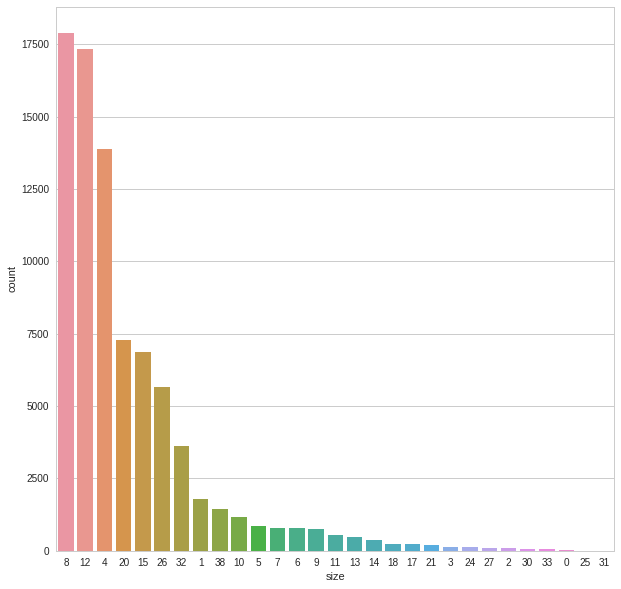

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x="size", data=modcloth_df, order=modcloth_df['size'].value_counts().index)

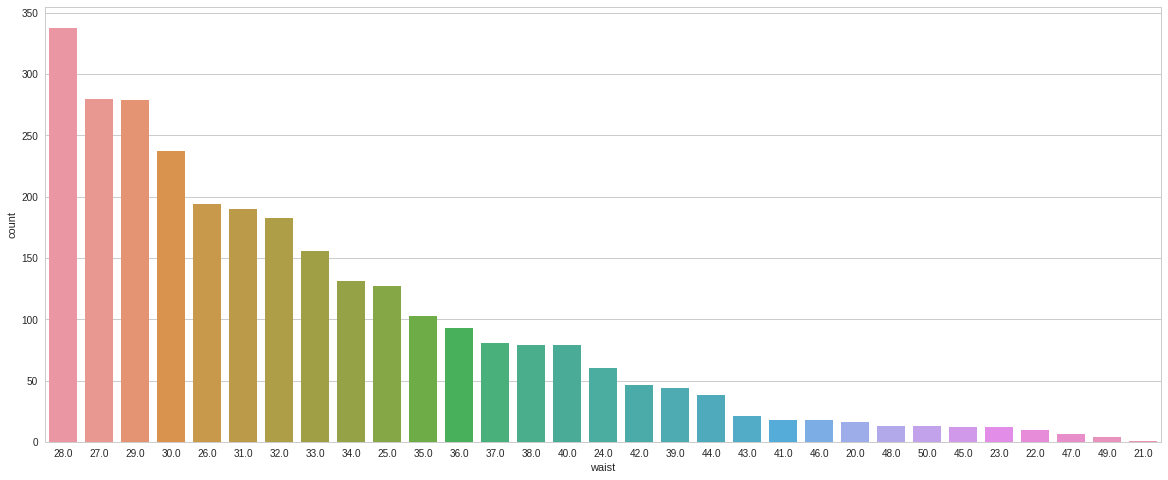

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x="waist", data=modcloth_df, order=modcloth_df['waist'].value_counts().index)

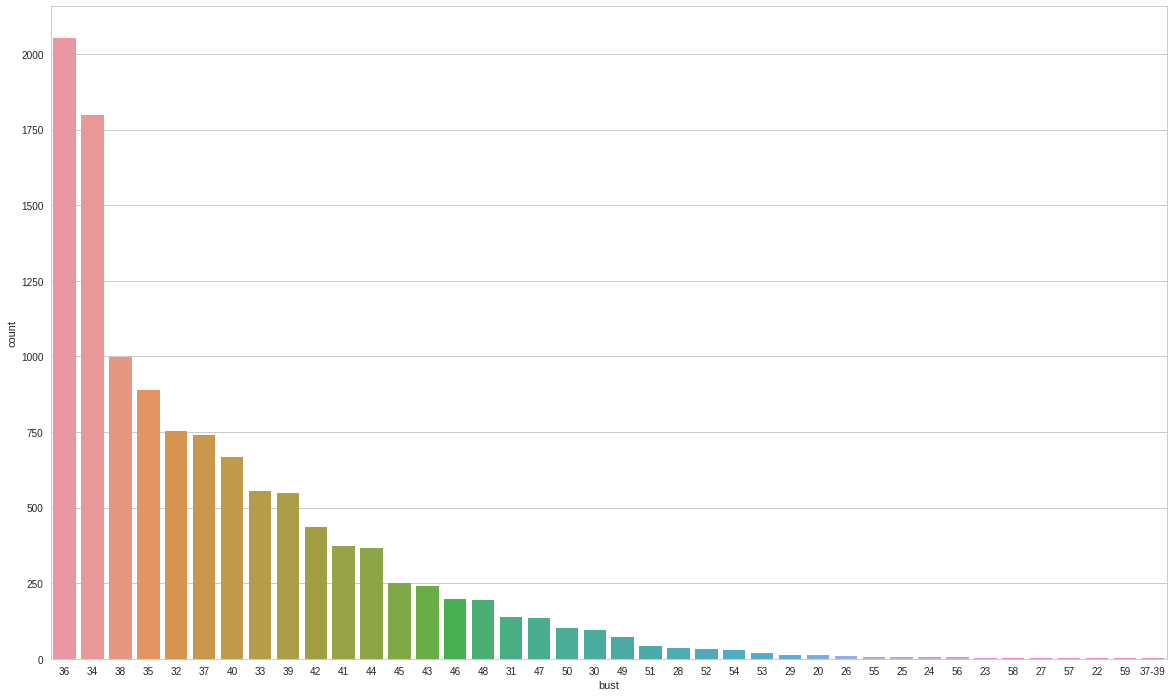

In [35]:
plt.figure(figsize=(20,12))
sns.countplot(x="bust", data=modcloth_df, order = modcloth_df['bust'].value_counts().index)

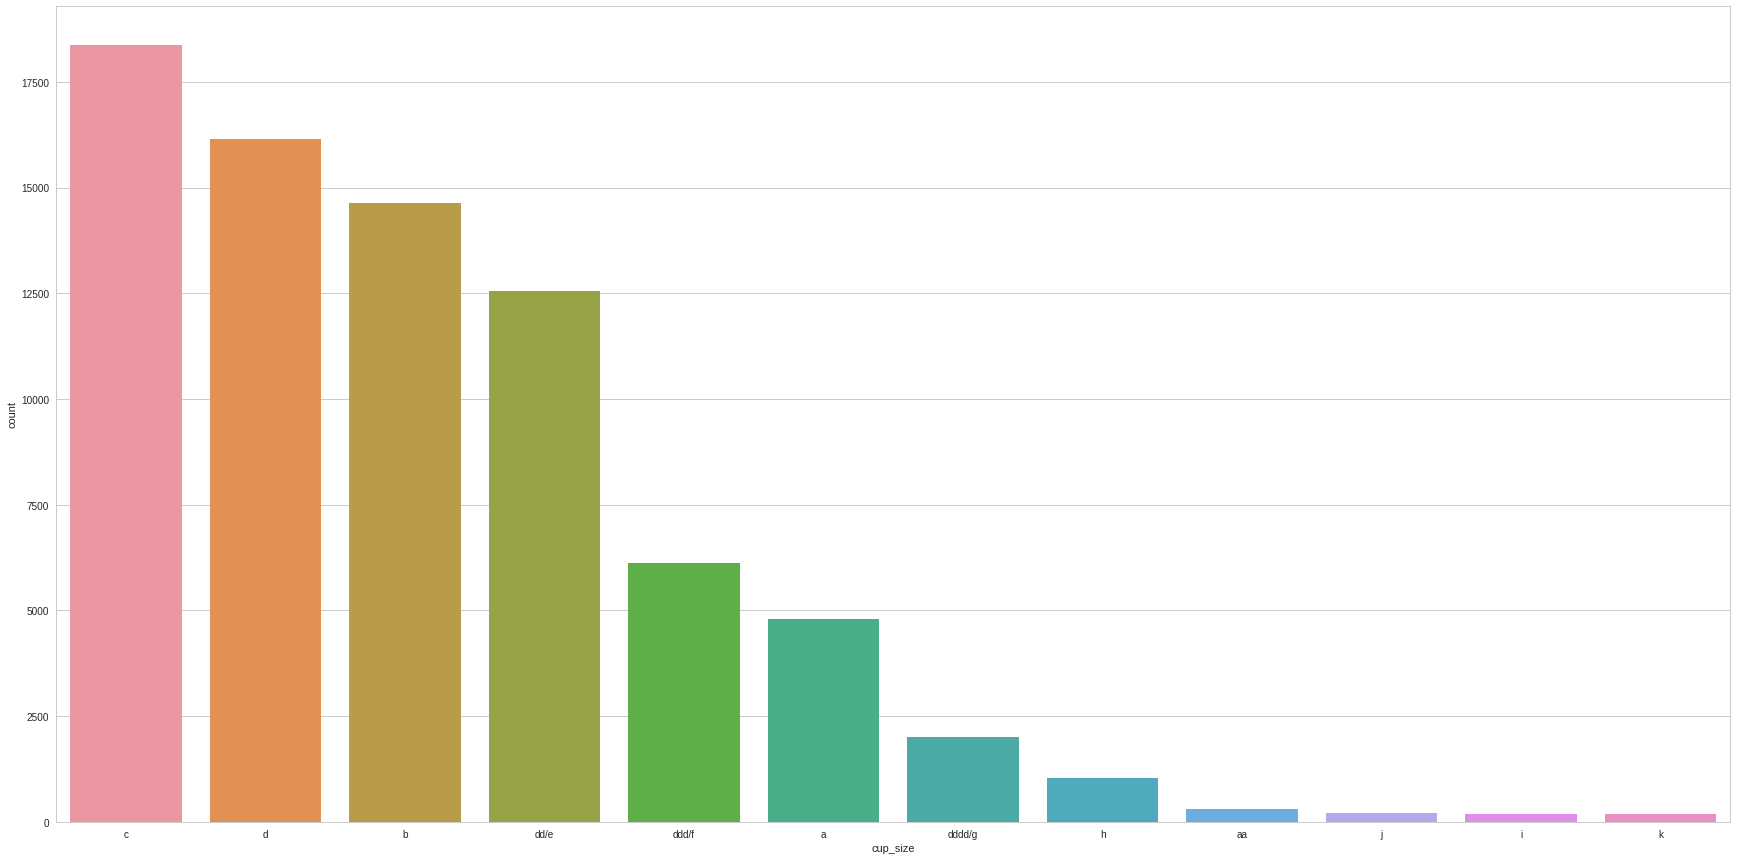

In [36]:
plt.figure(figsize=(30,15))
#sns.countplot(x="bra_size", data=modcloth_df)
sns.countplot(x="cup_size", data=modcloth_df, order = modcloth_df['cup_size'].value_counts().index)

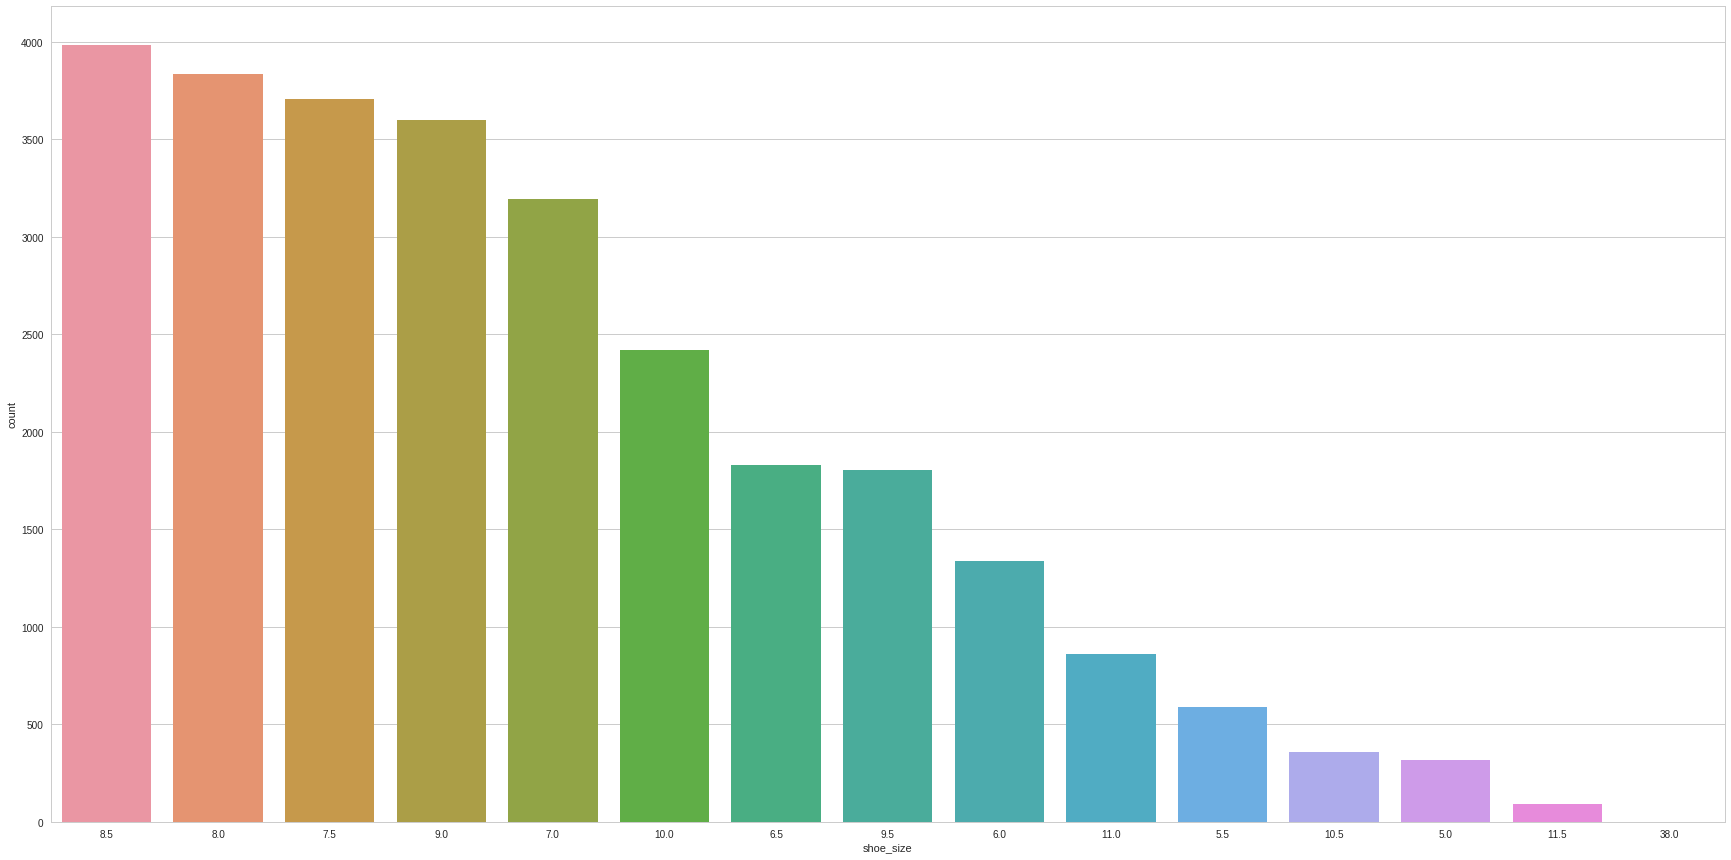

In [37]:
plt.figure(figsize=(30,15))
#sns.countplot(x="bra_size", data=modcloth_df)
sns.countplot(x="shoe_size", data=modcloth_df, order = modcloth_df['shoe_size'].value_counts().index)

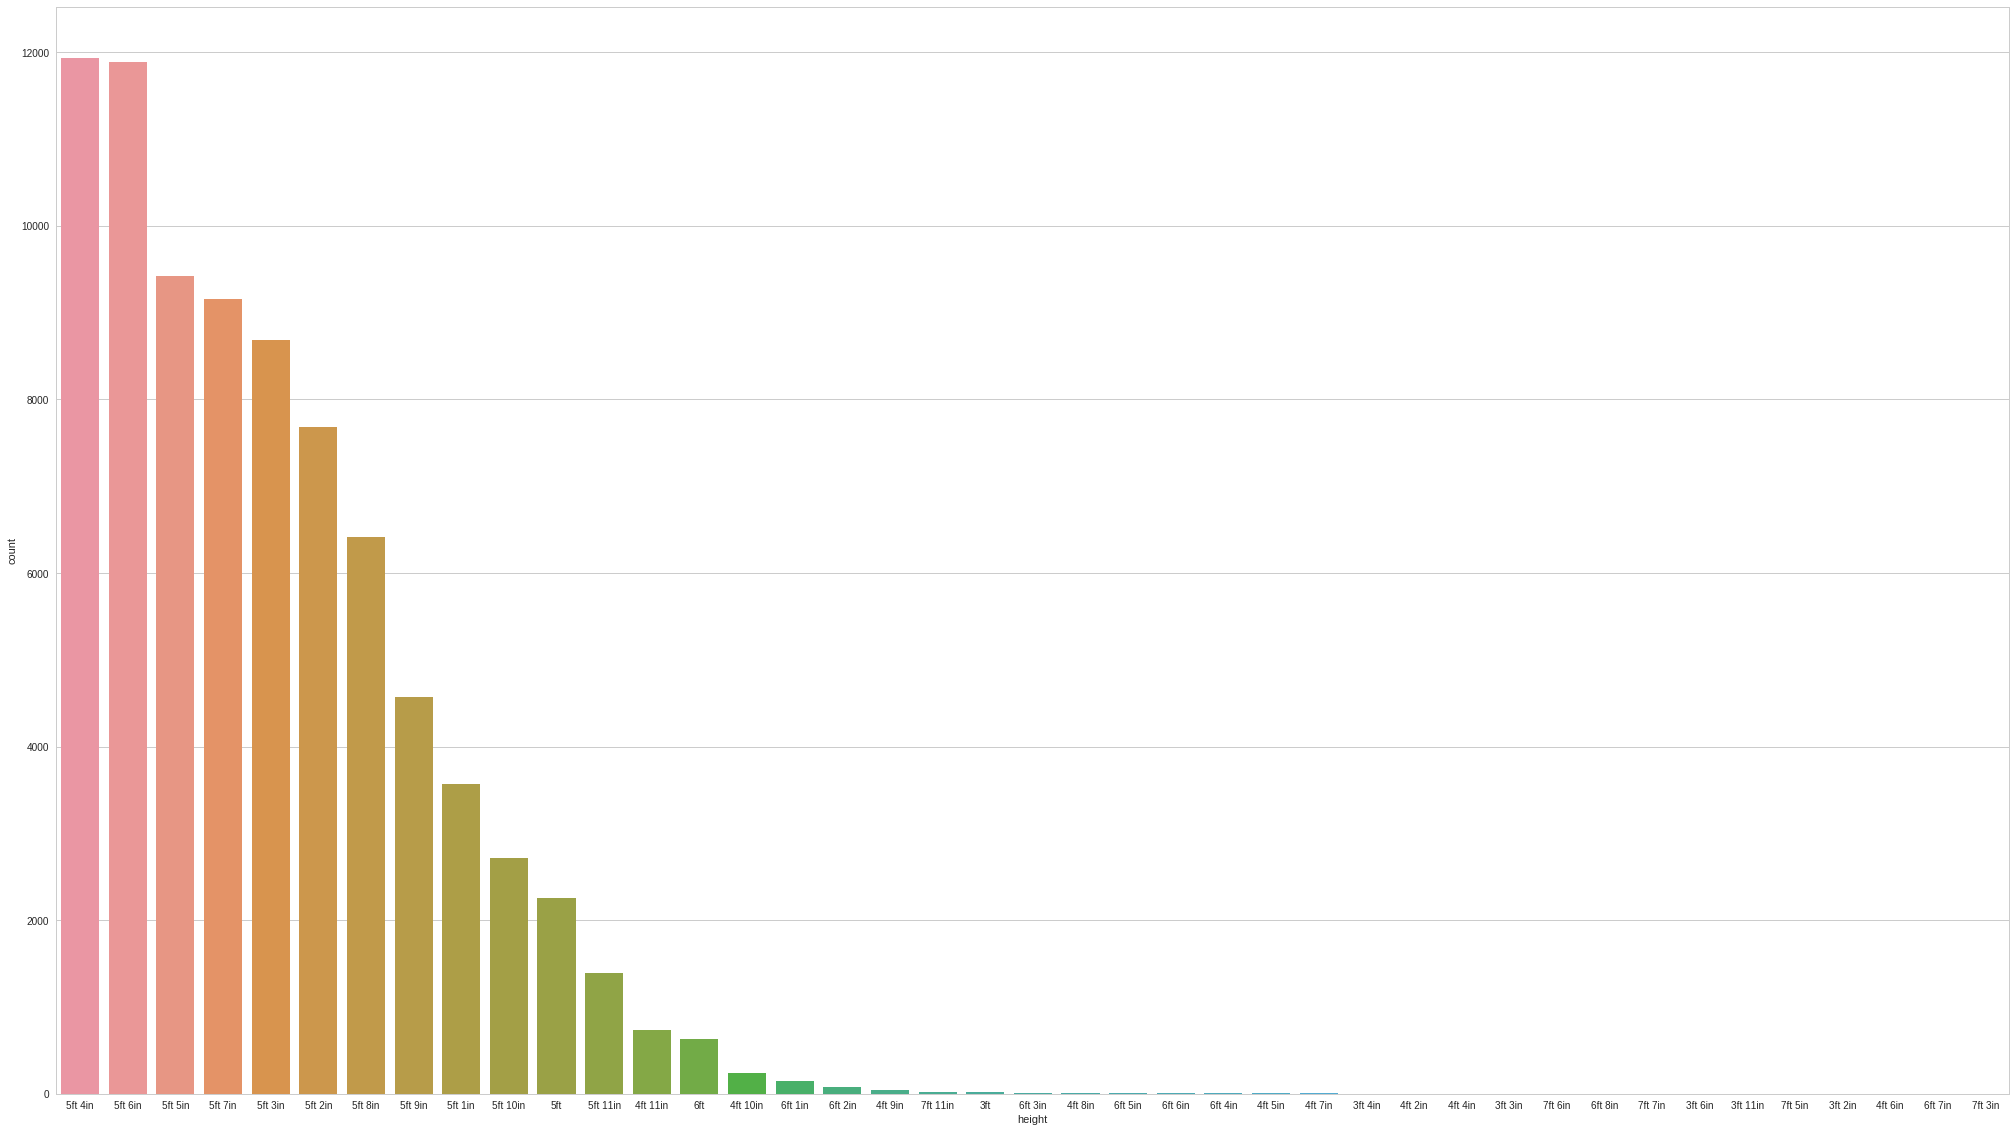

In [38]:
plt.figure(figsize=(35,20))
#sns.countplot(x="bra_size", data=modcloth_df)
sns.countplot(x="height", data=modcloth_df, order = modcloth_df['height'].value_counts().index)

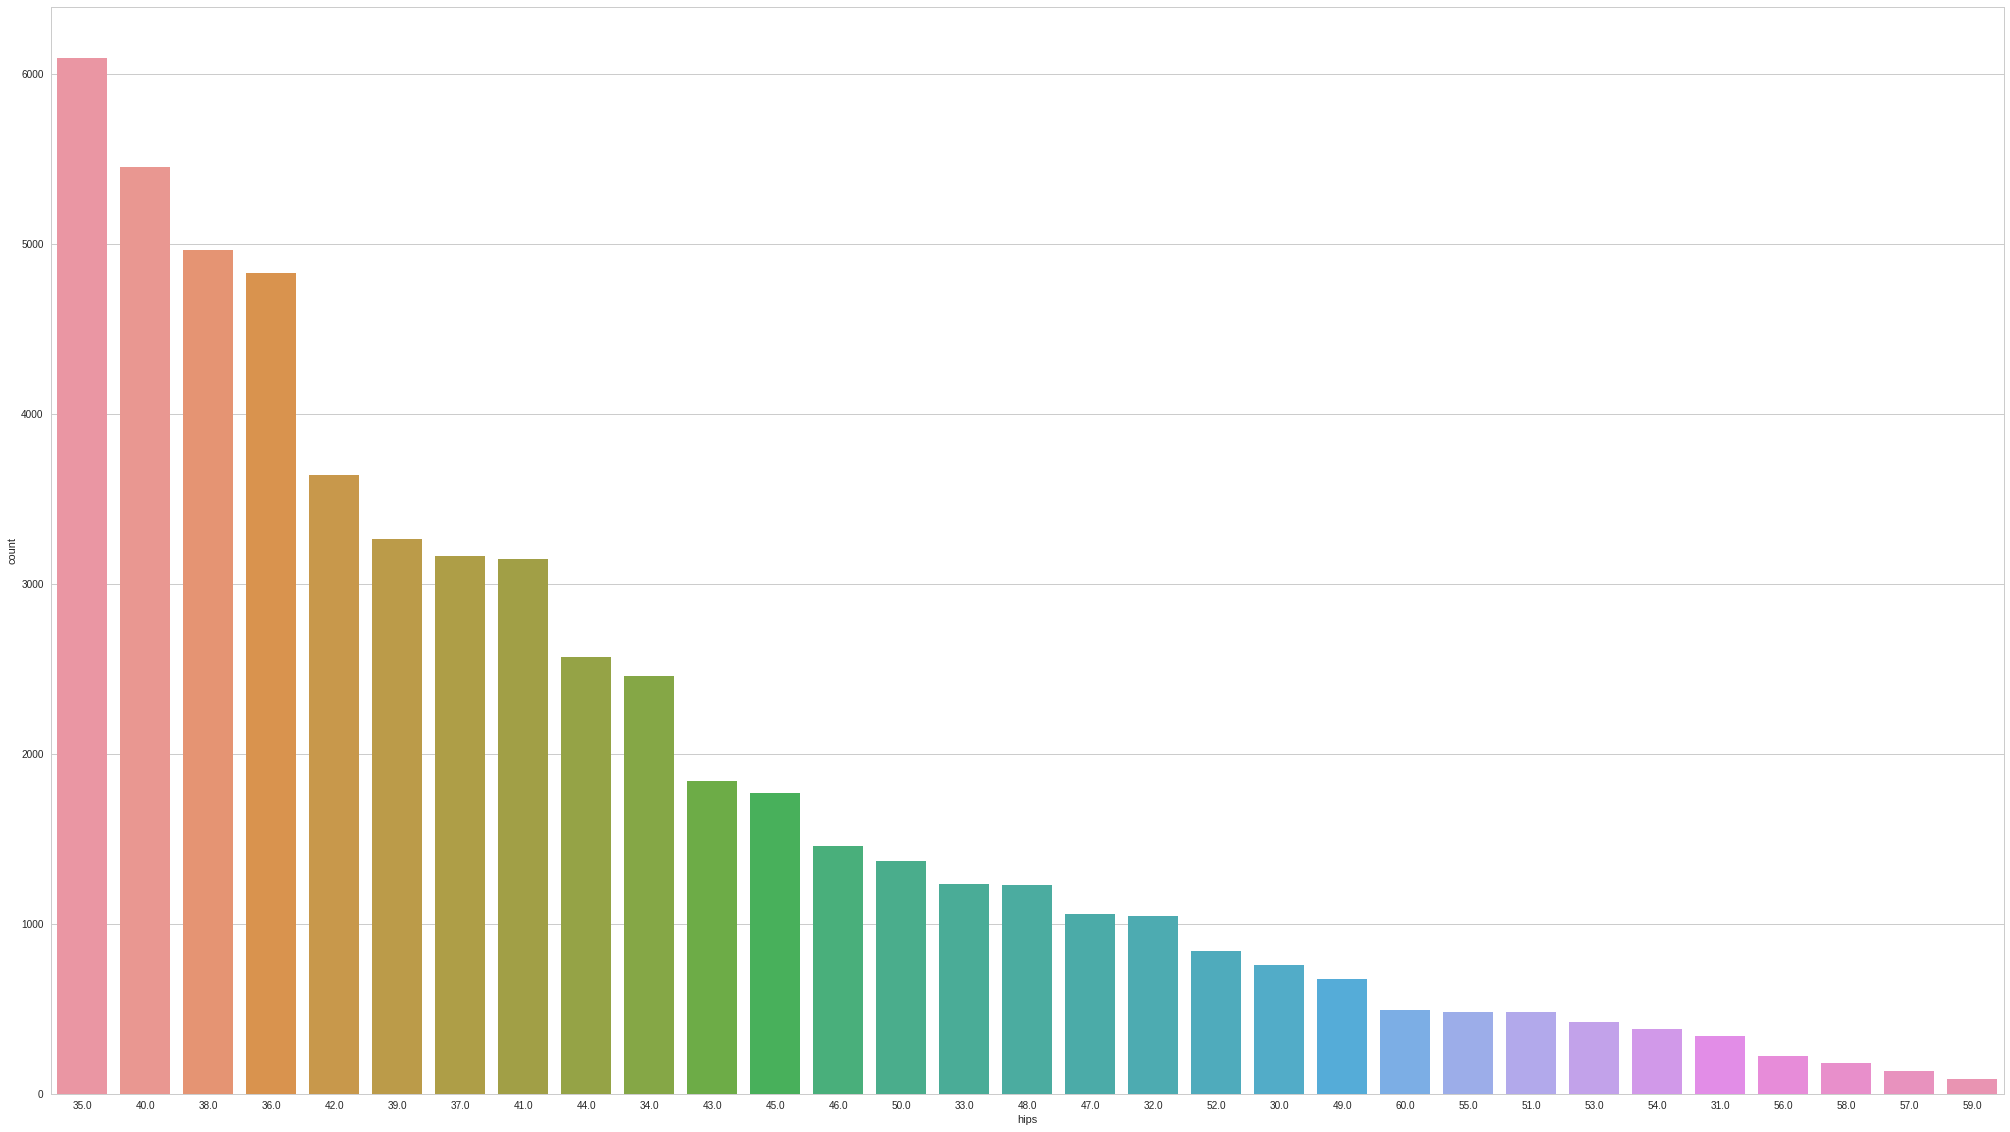

In [39]:
plt.figure(figsize=(35,20))
#sns.countplot(x="bra_size", data=modcloth_df)
sns.countplot(x="hips", data=modcloth_df, order = modcloth_df['hips'].value_counts().index)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


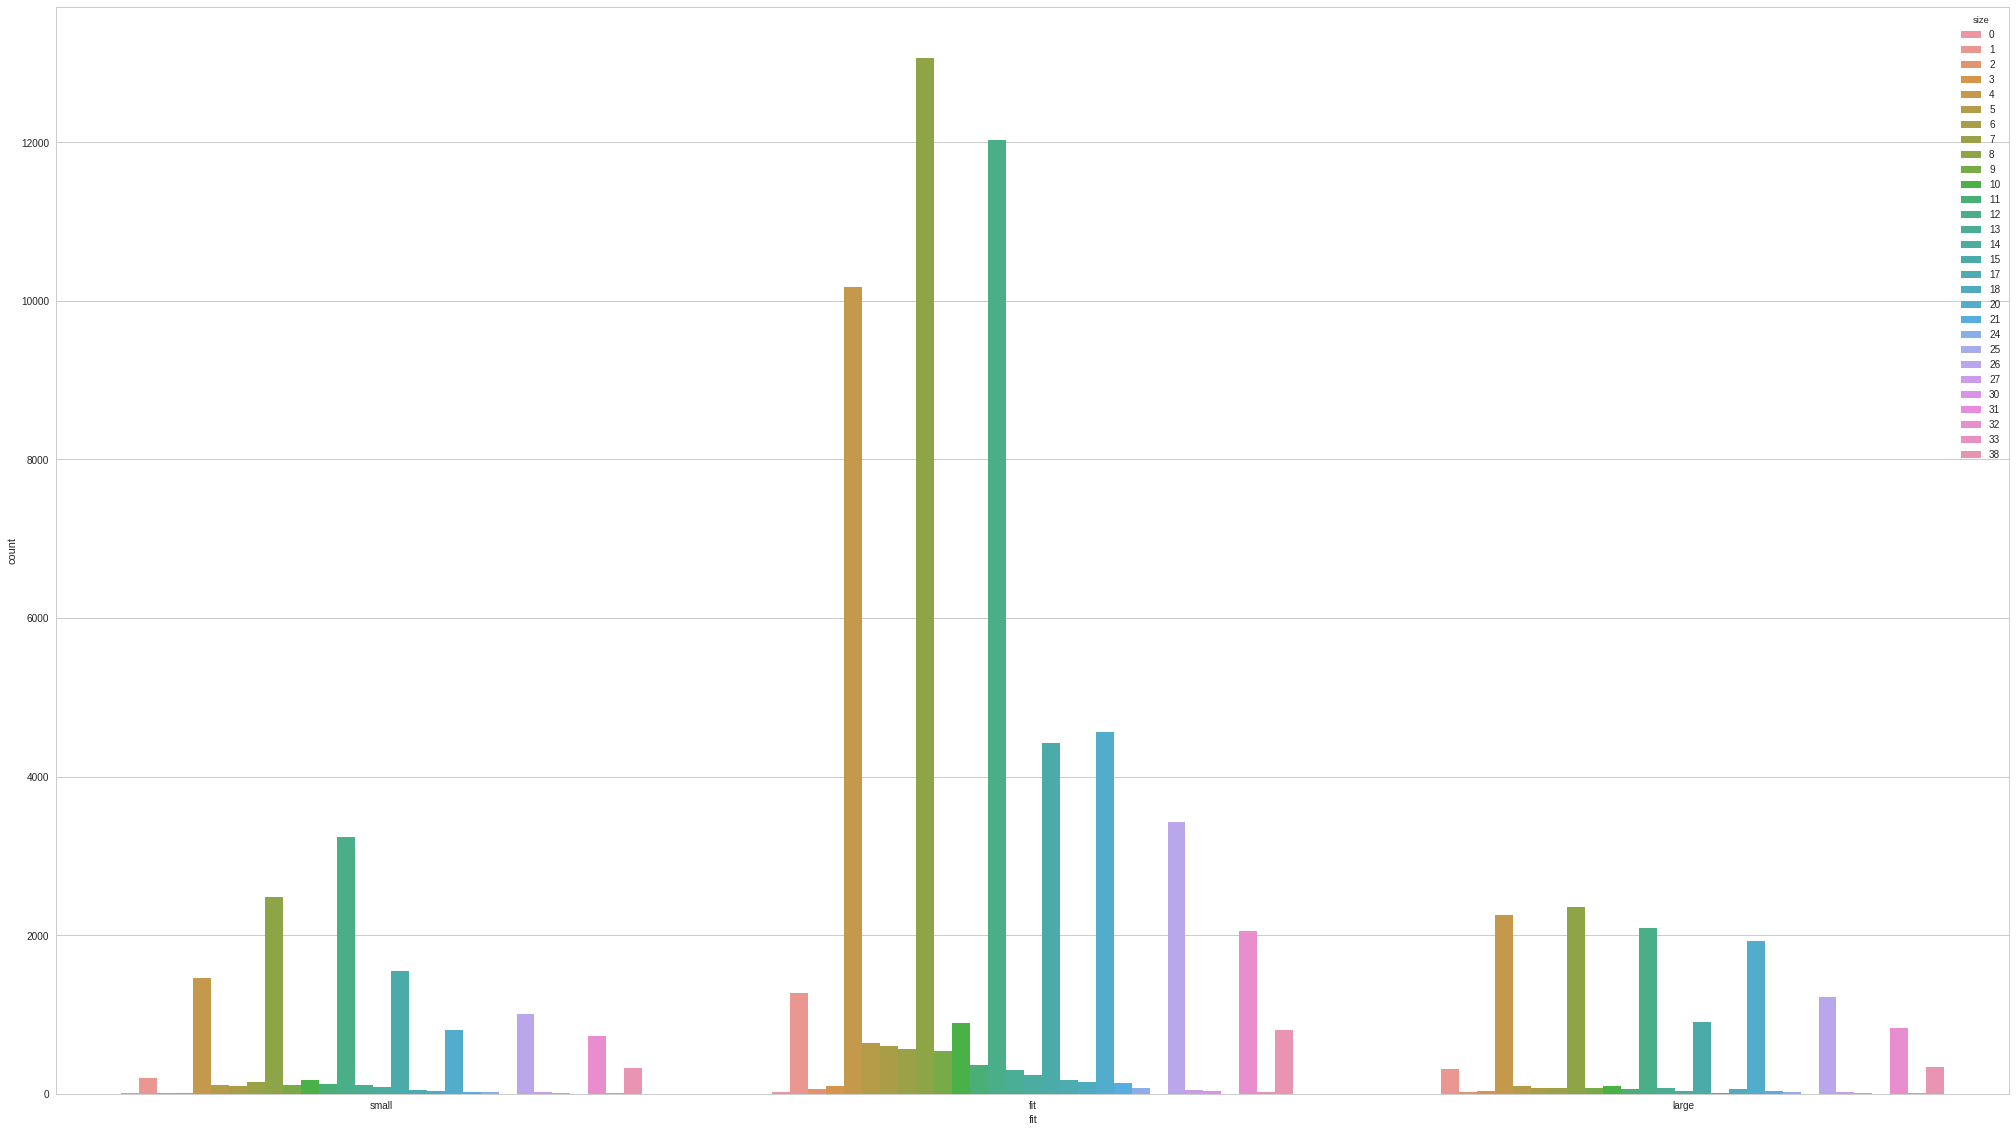

In [40]:
plt.figure(figsize=(35,20))
#sns.countplot(x="bra_size", data=modcloth_df)
sns.countplot(x="fit", hue="size", data=modcloth_df)

In [92]:
plt.figure(figsize=(35,20))
#sns.countplot(x="height", data=modcloth_df)
modcloth_df.size.value_counts().head(4)

AttributeError: 'numpy.int64' object has no attribute 'value_counts'

In [83]:
renttherunway_df = pd.read_json("clothing-fit-dataset-for-size-recommendation/renttherunway_final_data.json", lines=True)
renttherunway_df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [84]:
renttherunway_df.rename(columns={"rented for":"rented_for", "bust size":"bust_size", "body type":"body_type"}, inplace=True)

In [85]:
renttherunway_df.head()

,age,body_type,bust_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [90]:
renttherunway_df.bust_size.value_counts().head(4)

34b    27285
34c    23139
34d    18029
36c    13516
Name: bust_size, dtype: int64

In [45]:
#renttherunway_df.to_pickle("dataframe/renttherunway_renamed.pkl")
renttherunway_df=pd.read_pickle("dataframe/renttherunway_renamed.pkl")

In [46]:
!ls -l dataframe

total 142164
-rw-r--r-- 1 sdutta sdutta  34302379 May  6 15:33 modcloth_renamed.pkl
-rw-rw-r-- 1 sdutta sdutta   8837383 May  7 08:22 modcloth_selected.pkl
-rw-r--r-- 1 sdutta sdutta 102431391 May  6 19:37 renttherunway_renamed.pkl


In [47]:
renttherunway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
age               191584 non-null float64
body_type         177907 non-null object
bust_size         174133 non-null object
category          192544 non-null object
fit               192544 non-null object
height            191867 non-null object
item_id           192544 non-null int64
rating            192462 non-null float64
rented_for        192534 non-null object
review_date       192544 non-null object
review_summary    192544 non-null object
review_text       192544 non-null object
size              192544 non-null int64
user_id           192544 non-null int64
weight            162562 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


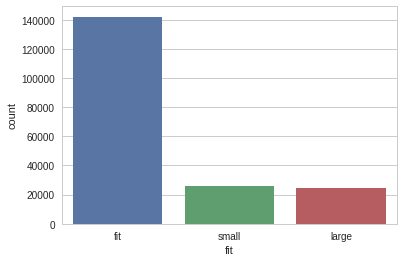

In [48]:
sns.countplot(x="fit", data=renttherunway_df)

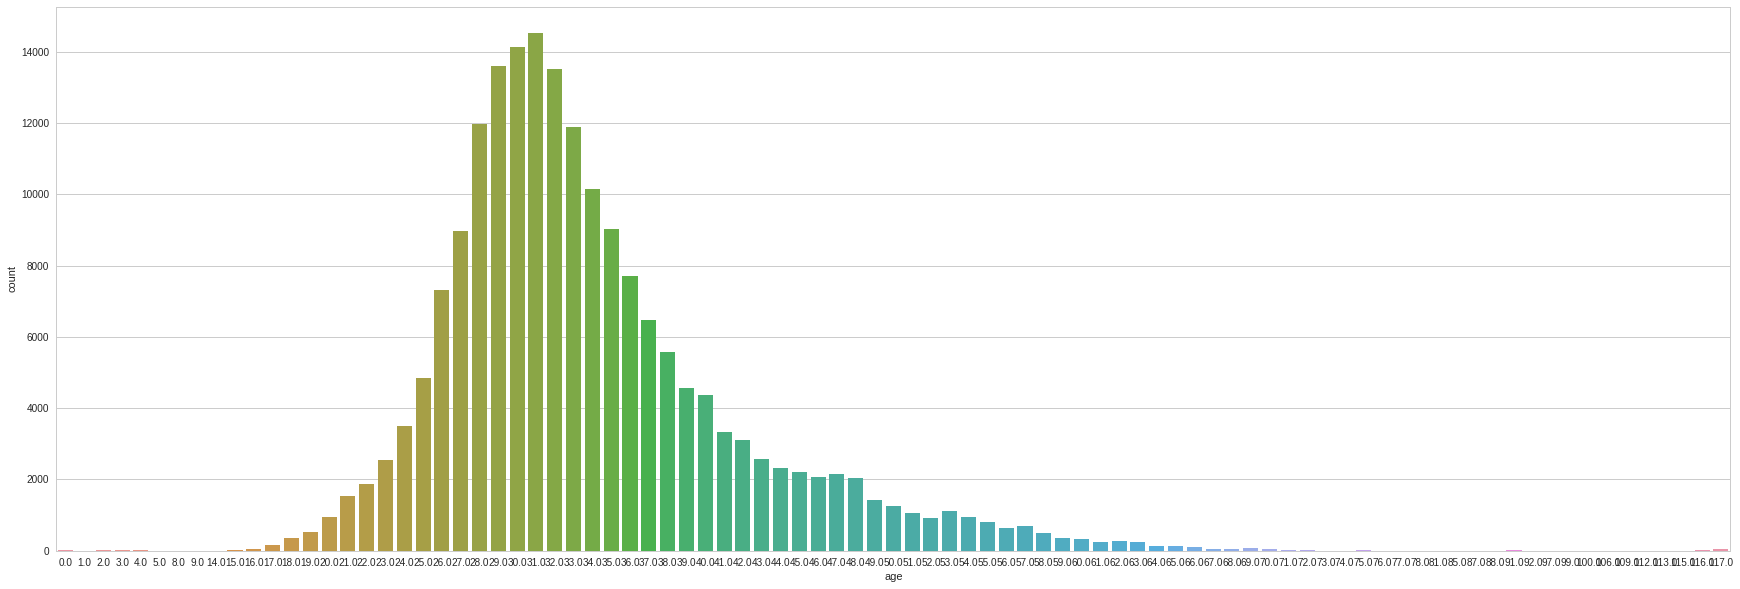

In [49]:
plt.figure(figsize=(30,10))
sns.countplot(x="age", data=renttherunway_df)

In [50]:
renttherunway_df.age.mean()

33.871017412727575

In [51]:
modcloth_df.mean()

bra_size         35.972125
hips             40.358501
item_id      469325.229170
quality           3.949058
shoe_size         8.145818
size             12.661602
user_id      498849.564718
waist            31.319223
dtype: float64

In [52]:
modcloth_df.median()

bra_size         36.0
hips             39.0
item_id      454030.0
quality           4.0
shoe_size         8.0
size             12.0
user_id      497913.5
waist            30.0
dtype: float64

In [53]:
modcloth_df[["size","fit","hips","waist"]]

,size,fit,hips,waist
0,7,small,38.0,29.0
1,13,small,30.0,31.0
2,7,small,NaN,30.0
3,21,fit,NaN,NaN
4,18,small,NaN,NaN
5,11,small,41.0,27.0
6,5,large,NaN,26.0
7,11,small,42.0,NaN
8,30,small,50.0,NaN
9,13,fit,41.0,NaN


In [1]:
modcloth_df[modcloth_df["size"].isna()]

NameError: name 'modcloth_df' is not defined